In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
col_names = ['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
pima= pd.read_csv('/Users/kartheekseemala/Downloads/diabetes.csv',header=None,names=col_names)
pima.drop(pima.index[:1],inplace=True)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [22]:
pima.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,99,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [23]:
pima.describe().T

,count,unique,top,freq
Pregnant,768,17,1,135
Glucose,768,136,99,17
BP,768,47,70,57
Skin,768,51,0,227
Insulin,768,186,0,374
BMI,768,248,32,13
Pedigree,768,517,0.254,6
Age,768,52,22,72
Label,768,2,0,500


In [24]:
pima.isnull().sum()

Pregnant    0
Glucose     0
BP          0
Skin        0
Insulin     0
BMI         0
Pedigree    0
Age         0
Label       0
dtype: int64

In [25]:
pima.shape

(768, 9)

In [30]:
feature_cols = ['Pregnant','Insulin','BMI','Age','Glucose','BP','Pedigree']
X = pima[feature_cols]
y = pima.Label #Target Variable
y.shape
X.shape

(768, 7)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7922077922077922

In [33]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix 

array([[132,  14],
       [ 34,  51]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



In [40]:
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba,pos_label='1')

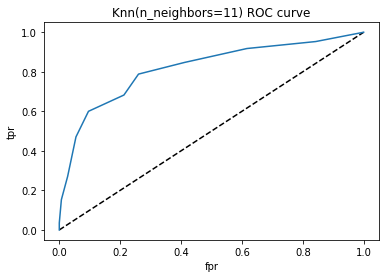

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8168009669621272

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7669270833333334
Best Parameters: {'n_neighbors': 17}
